# **Cross Vaildation**

In machine learning, while building a predictive model for some classification or regression task we always split the data set into two different parts that is training and testing. The training part is used to train the machine learning model whereas the testing part is used for predictions by the model. These predictions are then evaluated using different evaluation methods.

But do you think if you are getting an 85% test accuracy you will get the same performance of the model on production data? Does it guarantee the same results? The answer to this question is No we cannot expect the same accuracy. We can just get close to it but not the same. Therefore we need a method that can tell us that this is the range of accuracy that we can expect when we will use the model in production. 

This is where **K-Fold cross-validation** comes into the picture that helps us to give us an estimate of the model performance on unseen data. Often this method is used to give stakeholders an estimate of accuracy or the performance of the model when it will put in production

## **What is K-Fold Cross Validation?**

It is methods that help a programmer to understand the model estimated accuracy on unseen data or we can say how good the model would be in production. Suppose if we are asked by anyone what would be the accuracy that we can expect when we put this machine learning model in production? To answer this question we can perform K-Fold cross-validation to get an idea of the range of accuracy like 75%-85%. This concludes then when the model would be put in production we can expect this much accuracy on new unseen data points. 

This technique creates and validates a model multiple times. This multiple times depends upon us we need to define a value for that. This value is commonly represented as K. If we define it to be 5 then 5 times the model will be validated. Now how to decide the value of K? There is no fixed formula to compute the value of 5 whereas keeping it 10 is a good approach. A random function is used to divide the data into these many folds. Suppose if you have 10 data points in the data set and you have defined K = 5 then 10/5=2, so there would be 2 data points that would be kept for testing for each fold and rest in training. 

## **What are the steps to be followed while doing K- Fold Cross-validation?**

First, we need to split the data set into K folds then keep the fold data separately. Use all other folds as the single training data set and fit the model on the training set and validate it on the testing data. Keep the validation score and repeat the whole process K times. At last, analyze the scores, take the average and divide that by K.


Let us see the implementation of it. We will first import the libraries and will define random data points. We will then check how training and testing data is transformed.

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy statsmodels sklearn --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
data = array([1,2,3,4,5,6,7,8,9,10])
kfolds = KFold(10)
for train, test in kfolds.split(data):
    print('Training Data: %s,Testing Data: %s' % (data[train], data[test]))

We had 10 data points in the data set and we defined K=10 that meant there would only be 1 data point present in the testing and all others would be in training. This type of Cross-Validation is also called as Leave One Out Cross-Validation. (LOOCV). 

When k_folds is equal to the number of data points. 

`(LOOCV = n_splits=n)`

## **How to implement it on a data set to get an estimate of the accuracy?**

Now we will implement it on the Pima Indians diabetes data set to check an estimate of the accuracy that we can expect on the production data. We will start by importing the libraries and then the data. Use the below code for the same. 

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('pimadiabetes.csv')

Now we will divide this data set into features and targets. We will then define folds, we have set the splits values to be 10 which means there would be 10 folds. After this, we will define our model and check the cross val score. Refer to the below code for the same. 

In [2]:
X = df.values[:,0:8]
y = df.values[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.50, random_state=1)
kfolds = KFold(n_splits=10)
model = RandomForestClassifier()
score = cross_val_score(model, X, y, cv=kfolds)
print(score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[0.67532468 0.81818182 0.71428571 0.66233766 0.77922078 0.75324675
 0.83116883 0.85714286 0.73684211 0.76315789]


In [4]:
print("Accuracy:",(score.mean()*100))

Accuracy: 75.9090909090909


Now we will check the range that will give us the min and max accuracy that we can expect from the model. Use the below code to check the same. 

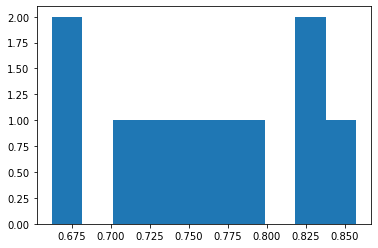

95.0 confidence interval 66.53% and 85.13%


In [8]:
plt.hist(score)
plt.show()
alpha = 0.95                         
p = ((1.0-alpha)/2.0) * 100              
#value (border)
lower = max(0.0, np.percentile(score, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(score, p))
print('%.1f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))

In this article, we discussed how we can make use of K- Fold cross-validation to get an estimate of the model accuracy when it is exposed to the production data. The min value of K should be kept as 2 and the max value of K can be equal to the total number of data points. This is also called as Leave one out cross-validation. At last, we discussed how we can implement K fold cross-validation on a data set. 

You can refer to the article [here](https://analyticsindiamag.com/k-fold-cross-validation-and-loocv/).